# Script for generating a useful graphic for quickly estimating the relationship between the color, wavelength, and energy of light in the visible spectrum

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt

def wavelength_to_rgb(wavelength, gamma=0.8):

    '''This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    R *= 255
    G *= 255
    B *= 255
    return (int(R), int(G), int(B))

def wavelength_to_energy(nm):
    return 1240/nm

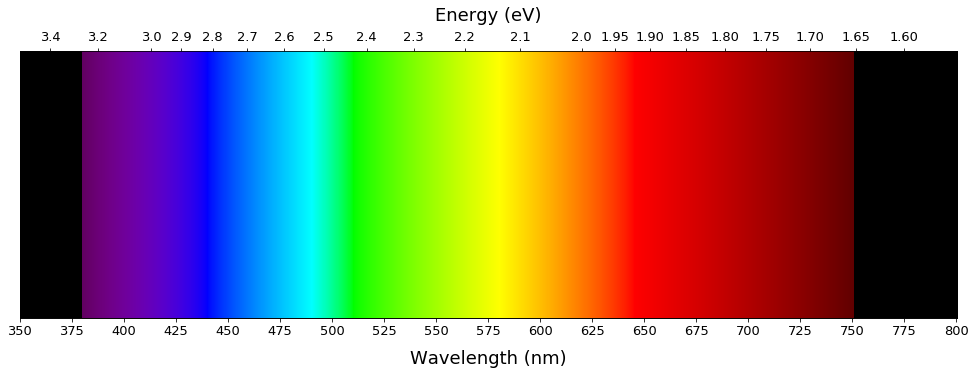

In [18]:
#range of wavelengths to display (in nm)
bot = 350
top = 800
step =0.25

#generate the wavelength and color values
wls = np.arange(bot,top+step,step)
colors = np.array([wavelength_to_rgb(w) for w in wls])

#generate the wavelength ticks
tick_wls = np.arange(bot,top+25,25)
tick_pos = [(wls==tick_wls[x]).argmax() for x in range(len(tick_wls))]

s=1.4
fig,ax = plt.subplots(1,1,figsize=(12*s,4*s))
img = np.array([np.vstack([c for _ in range(512)]) for c in colors])
img = np.swapaxes(img,0,1)
ax.imshow(img)

ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_wls)
ax.set_xlabel('Wavelength (nm)',labelpad=12,fontsize=18)
ax.set_yticks([])
ax.set_xlim(0,len(wls))
ax.set_ylim(-1,512)

ax2 = fig.add_axes(ax.get_position())
ax2.tick_params(labelbottom=False,labeltop=True, labelleft=False, labelright=False,
    bottom=False, left=False, right=False,top=True)
ax2.set_xlim(ax.get_xlim())
ax2.set_ylim(ax.get_ylim())
ax2.imshow(img)
ax2.set_position(ax.get_position())

#The energy ticks were written manually for maximum aesthetics
tick_ener = np.array(['3.4','3.2','3.0','2.9','2.8','2.7','2.6','2.5','2.4','2.3','2.2','2.1','2.0','1.95','1.90','1.85','1.80','1.75','1.70','1.65','1.60'])
all_e = np.array([wavelength_to_energy(w) for w in wls])
#utility function for plotting energy ticks
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

tick_e_pos = [find_nearest(all_e,float(e)) for e in tick_ener]
ax2.set_xticks(tick_e_pos)

ax2.set_xticklabels(tick_ener)
ax2.set_xlabel('Energy (eV)',labelpad=10,fontsize=18)
ax2.xaxis.set_label_position('top') 

ax.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)

plt.show()
#plt.savefig('UV-Vis-IR.pdf',dpi=300)